# 파이토치 RNN 분류 모델
- 코드 출처: https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html

In [ ]:
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2020-10-30 09:02:17--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.226.49.83, 13.226.49.39, 13.226.49.84, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.226.49.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  18.1MB/s    in 0.2s    

2020-10-30 09:02:17 (18.1 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italia

이름: Ślusàrski

In [ ]:
from io import open
import glob
import os

def findFiles(path):
  return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
  return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn' and c in all_letters
  )

print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []

def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Russian.txt', 'data/names/Arabic.txt', 'data/names/Chinese.txt', 'data/names/French.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Korean.txt', 'data/names/Dutch.txt', 'data/names/Polish.txt', 'data/names/Vietnamese.txt', 'data/names/Greek.txt', 'data/names/Czech.txt', 'data/names/Japanese.txt', 'data/names/English.txt', 'data/names/Scottish.txt', 'data/names/Spanish.txt', 'data/names/Irish.txt', 'data/names/German.txt']
Slusarski


In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
import torch

def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
torch.Size([5, 1, 56])


## 신경망 생성

- 모델 생성 방법 참고 : https://pytorch.org/tutorials/beginner/former_torchies/nnft_tutorial.html

In [ ]:
import torch.nn as nn 

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, outupt_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, outupt_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output, next_hidden)

tensor([[-2.8725, -2.9039, -2.8876, -2.9259, -2.8823, -2.8283, -2.8635, -3.0039,
         -2.9079, -2.8672, -2.8504, -2.9670, -2.9026, -2.8135, -2.9707, -2.8719,
         -2.8807, -2.8478]], grad_fn=<LogSoftmaxBackward>) tensor([[ 0.1294,  0.0922, -0.0232,  0.0484, -0.0176, -0.0545,  0.0373,  0.0564,
         -0.0232,  0.0021,  0.1082,  0.0901,  0.1052, -0.0112, -0.0172, -0.0199,
         -0.0252, -0.0464,  0.0865,  0.0482, -0.0112, -0.0821,  0.0010, -0.0281,
         -0.1234, -0.0649, -0.0499,  0.0273, -0.0462, -0.0287, -0.1185,  0.0370,
          0.0168,  0.0743,  0.0120, -0.0210,  0.0736, -0.0065, -0.0112, -0.0205,
         -0.0483, -0.0554,  0.1195,  0.0691, -0.0290, -0.0210, -0.0467, -0.0137,
         -0.0493,  0.0540, -0.1261,  0.0064, -0.0026, -0.0847, -0.0931, -0.0379,
          0.0256, -0.0457,  0.0378, -0.1318, -0.0800,  0.0115, -0.1117,  0.0216,
         -0.0952,  0.1164,  0.0218,  0.0027,  0.0003,  0.0383,  0.0011, -0.0840,
         -0.0026, -0.0876, -0.1311, -0.0701,  0.00

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output, next_hidden)

tensor([[-2.8725, -2.9039, -2.8876, -2.9259, -2.8823, -2.8283, -2.8635, -3.0039,
         -2.9079, -2.8672, -2.8504, -2.9670, -2.9026, -2.8135, -2.9707, -2.8719,
         -2.8807, -2.8478]], grad_fn=<LogSoftmaxBackward>) tensor([[ 0.1294,  0.0922, -0.0232,  0.0484, -0.0176, -0.0545,  0.0373,  0.0564,
         -0.0232,  0.0021,  0.1082,  0.0901,  0.1052, -0.0112, -0.0172, -0.0199,
         -0.0252, -0.0464,  0.0865,  0.0482, -0.0112, -0.0821,  0.0010, -0.0281,
         -0.1234, -0.0649, -0.0499,  0.0273, -0.0462, -0.0287, -0.1185,  0.0370,
          0.0168,  0.0743,  0.0120, -0.0210,  0.0736, -0.0065, -0.0112, -0.0205,
         -0.0483, -0.0554,  0.1195,  0.0691, -0.0290, -0.0210, -0.0467, -0.0137,
         -0.0493,  0.0540, -0.1261,  0.0064, -0.0026, -0.0847, -0.0931, -0.0379,
          0.0256, -0.0457,  0.0378, -0.1318, -0.0800,  0.0115, -0.1117,  0.0216,
         -0.0952,  0.1164,  0.0218,  0.0027,  0.0003,  0.0383,  0.0011, -0.0840,
         -0.0026, -0.0876, -0.1311, -0.0701,  0.00

## 모델 학습
- 준비

In [ ]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i
  
print(categoryFromOutput(output))

('English', 13)


In [ ]:
import random

def randomChoice(l):
  return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category: {}\tline: {}'.format(category, line))

category: French	line: Favre
category: Italian	line: Albani
category: Arabic	line: Guirguis
category: Russian	line: Ruzanov
category: Greek	line: Demakis
category: Korean	line: Jung
category: Korean	line: Sun
category: Scottish	line: Walker
category: Italian	line: Abbatantuono
category: Korean	line: Choe


## 손실함수

In [ ]:
criterion = nn.NLLLoss()

## 모델 학습

In [ ]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()

  rnn.zero_grad()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = 'O' if guess == category else 'X (%s)' % category
    print("%d %d (%s) %.4f %s / %s %s" % (iter, iter/n_iters * 100, timeSince(start), loss, line, guess, correct))

  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0

5000 5 (0m 6s) 2.8486 Landau / Arabic X (German)
10000 10 (0m 12s) 1.4185 Furusawa / Japanese O
15000 15 (0m 19s) 1.6441 Rorris / Portuguese X (Greek)
20000 20 (0m 25s) 0.1461 Fujimaki / Japanese O
25000 25 (0m 31s) 0.6789 Dunajski / Polish O
30000 30 (0m 37s) 1.2880 Jung / Chinese X (Korean)
35000 35 (0m 44s) 0.2854 Bobienski / Polish O
40000 40 (0m 50s) 0.6199 Vesnitsky / Russian O
45000 45 (0m 56s) 1.1378 Ding / Vietnamese X (Chinese)
50000 50 (1m 3s) 0.4871 Araujo / Portuguese O
55000 55 (1m 9s) 2.8244 Shirai / Arabic X (Japanese)
60000 60 (1m 15s) 0.6504 Hlyzov / Russian O
65000 65 (1m 22s) 1.0848 Favreau / French O
70000 70 (1m 28s) 0.3698 Ryoo / Korean O
75000 75 (1m 35s) 0.3185 Luspekaev / Russian O
80000 80 (1m 41s) 0.3781 Suk / Korean O
85000 85 (1m 47s) 1.3442 Palmeiro / Italian X (Portuguese)
90000 90 (1m 54s) 3.1850 Rootham / Czech X (English)
95000 95 (2m 0s) 3.2739 Anderson / Scottish X (English)
100000 100 (2m 6s) 1.5908 Fuentes / Portuguese X (Spanish)


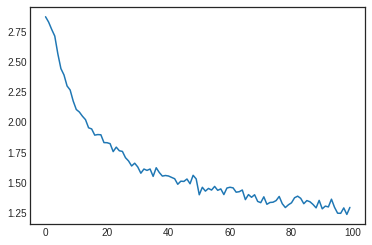

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.plot(all_losses)
plt.show()

## 모델 테스트

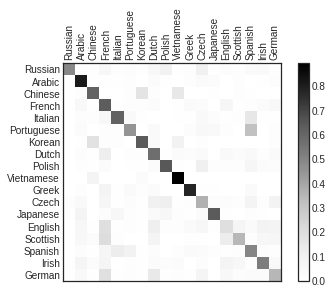

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

## 사용자 입력으로부터의 실행

In [ ]:
def predict(input_line, n_predictions=3):
  print('\n> %s' % input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f) %s' % (value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

predict('Jackson')
predict('Bill')
predict('Dovesky')
predict('Lee')


> Jackson
(-1.01) English
(-1.68) Scottish
(-1.84) Dutch

> Bill
(-1.59) English
(-1.60) Irish
(-1.89) Scottish

> Dovesky
(-0.28) Czech
(-2.20) Russian
(-2.77) English

> Lee
(-1.16) Chinese
(-1.38) Vietnamese
(-1.93) Korean
